THE SPARKS FOUNDATION

Data Science & Business Analytics-Internship

Saurav

Importing Libraries

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#Dataset_url = http://bit.ly/w-data
df = pd.read_csv('http://bit.ly/w-data')

In [8]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Checking for null values

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [11]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Visualising The Data

Text(0, 0.5, 'Marks Per')

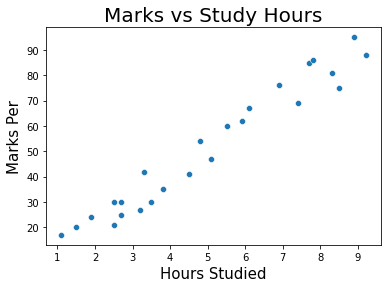

In [13]:
sns.scatterplot(x=df['Hours'],y=df['Scores'])
plt.title('Marks vs Study Hours',size=20)
plt.xlabel('Hours Studied',size=15)
plt.ylabel('Marks Per',size=15)

From the above plot we can say that their is a linear relationship btw Marks per and Hours studied

## Introducing Scikit Learn

Preparing the data

In [17]:
X = df.iloc[:,:-1].values

In [18]:
y = df.iloc[:,1].values

Train | Test Split

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [22]:
X_train

array([[6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [23]:
y_train

array([76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21, 54, 95, 41],
      dtype=int64)

## Creating Linear model (Estimator)

#### Importing a model class from a model family

In [26]:
from sklearn.linear_model import LinearRegression

#### Create an instance of the model with parameters

In [28]:
model = LinearRegression()

In [29]:
model.fit(X_train,y_train)

LinearRegression()

## Plotting The Regression Line

In [31]:
model.coef_,model.intercept_

(array([9.78856669]), 2.370815382341881)

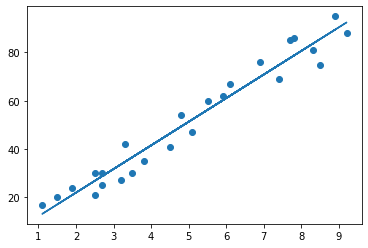

In [32]:
line = model.coef_*X+model.intercept_

plt.scatter(X,y)
plt.plot(X,line)


In [33]:
y_pred = model.predict(X_test)

In [34]:
df = pd.DataFrame({'Actual':y_test,'Prediction':y_pred})

In [35]:
df

,Actual,Prediction
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


#### Predicted Score

In [40]:
print('Predicted score if a student studies for 9.25 hrs/day :',(model.predict([[9.25]]))[0])

Predicted score if a student studies for 9.25 hrs/day : 92.91505723477056


In [41]:
from sklearn.metrics import mean_absolute_error
print('Mean absolute error: ',mean_absolute_error(y_test,y_pred))

Mean absolute error:  4.419727808027652
